<table style="width: 100%;">
  <tr>
    <td style="text-align: left;"><h1 style="font-size: 30px;">Score Predictor</h1></td>
    <td style="text-align: right;"><img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Logo_Universitat_de_Barcelona.png" alt="University of Barcelona Logo" width="200" /></td>
  </tr>
</table>

## 0. Introduction

How to create a predictive model to predict the "score" from other variables in a DataFrame:

### 1. Data Preparation:

Before building a predictive model, it's crucial to prepare and explore your data:

- **Data Exploration:** Start by exploring your DataFrame to understand the nature of the data. This includes examining descriptive statistics, visualizing distributions, and assessing correlations between variables.

- **Data Cleaning:** Address any missing or inconsistent data in your DataFrame. This may involve imputing missing values and removing outliers if necessary.

- **Data Preprocessing:** Encode categorical variables, normalize or standardize numerical variables if needed, and perform any additional feature transformations.

- **Data Splitting:** Split your data into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance.

### 2. Feature Selection (Optional):

You can perform feature importance evaluation or use feature selection techniques to identify the most relevant variables for predicting the "score." This can help improve model efficiency and accuracy.

### 3. Model Selection:

Choose an appropriate regression algorithm for your problem. Some common options include:

- **Linear Regression:** Assumes a linear relationship between predictor variables and the target variable.
- **Decision Tree Regression:** Uses decision trees to model non-linear relationships.
- **Random Forest Regression:** An extension of decision trees that combines multiple trees to improve accuracy.
- **Support Vector Regression (SVR):** Utilizes support vector machines for regression.

The choice of model will depend on the nature of your data and the prediction objective.

### 4. Model Training:

Use the training set to train the selected model. The model will learn to make predictions based on the provided features.

### 5. Model Evaluation:

Use the testing set to evaluate the model's performance. Common metrics for regression model evaluation include Mean Squared Error (MSE), R-squared (R²), Mean Absolute Error (MAE), and others depending on the context.

### 6. Model Tuning (if necessary):

If the model's performance is not satisfactory, you can fine-tune hyperparameters, try different algorithms, or consider additional feature engineering.

### 7. Cross-Validation (Optional):

Cross-validation is useful to obtain a more robust evaluation of the model's performance by splitting the data into multiple subsets and evaluating the model on each of them.

### 8. Predictions:

Once you are satisfied with the model's performance, you can use it to make predictions on new data or on the test data.

### 9. Deployment (Optional):

If you want to use the model in a production environment, you can deploy it to make real-time predictions.

Remember that the process of building and fine-tuning a model may require experimentation and patience. It's essential to evaluate the model on data it hasn't seen during training to ensure it has adequate generalization capabilities. Additionally, model choice and feature selection should be based on a deep understanding of the data and the problem you are trying to solve.

## 1. Data Preparation:

### Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import re 
import seaborn as sns
from scipy import stats

# Eliminate warnings for presentation purpuses
import warnings
warnings.filterwarnings('ignore') #ignore all warnings, very messy
#warnings.filterwarnings('default')
pd.options.mode.chained_assignment = None

#preatty printing
from rich import print
from tabulate import tabulate
from IPython.display import Markdown
from IPython.display import display, HTML
pd.set_option('display.max_colwidth', 20)

In [3]:
# From now on, we will only use the listings with more than 100 reviews
filtered_reviews = pd.read_csv('bdd_barcelona/processed/Test-1/processed_reviews.csv')
filtered_insight = pd.read_csv('bdd_barcelona/processed/Test-2/insight_encoded.csv')

In [4]:
def print_title(text):
    formatted_text = f"<b><big>{text}</big></b>"
    display(HTML(formatted_text))
    return

In [5]:
def col_table3(list_strings):
    num_columns = 5
    num_rows = len(list_strings) // num_columns + (len(list_strings) % num_columns > 0)
    table = []
    if(type(list_strings) is not list):
        list_strings = list_strings.tolist()
    for i in range(num_rows):
        row = list_strings[i::num_rows]
        row.extend([''] * (num_columns - len(row)))
        table.append(row)
    html_table = tabulate(table, headers=['', '', ''], tablefmt='html')
    display(HTML(html_table))
    return

In [6]:
print("These are the values we are working with, of wich, we will only use a few")
print_title("Insights dataset keys")
col_table3(filtered_insight.keys().values[1::])

print_title("Reviews dataset keys")
col_table3(filtered_reviews.keys().values[1::])


These are the values we are working with, of wich, we will only use a few

,,,,
Unnamed: 0,review_scores_rating,amenities_35,description_18,description_77
id,review_scores_accuracy,amenities_36,description_19,description_78
listing_url,review_scores_cleanliness,amenities_37,description_20,description_79
scrape_id,review_scores_checkin,amenities_38,description_21,description_80
last_scraped,review_scores_communication,amenities_39,description_22,description_81
source,review_scores_location,amenities_40,description_23,description_82
name,review_scores_value,amenities_41,description_24,description_83
neighborhood_overview,license,amenities_42,description_25,description_84
picture_url,instant_bookable,amenities_43,description_26,description_85
host_id,calculated_host_listings_count,amenities_44,description_27,description_86


,,,,
listing_id,reviewer_id,Cleaning,Veracity,General
id,reviewer_name,Communication,Location,word_count
date,comments,Arrival,Quality,


In [7]:
insights = filtered_insight.copy()

outpus_types = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value',]


A = insights.drop(columns=outpus_types, axis=1)

B = insights[outpus_types].copy()



display('------------------------------------------------------')
string = f"""
First of all, we will divide the dataset into input (A) and target (B), 
where the target is the scores.

We will start with a very rudimentary model and keep on making it richer 
in terms of input and method:Table 
    <b>A:</b>"""
display(HTML(string))
col_table3(A.columns.to_numpy())
string = f"""
I'm deliberately excluding 'host_is_superhost' due to it being calculated 
with the score, but future calculations will include:\n Talbe
    <b>B:</b>"""
display(HTML(string))
col_table3(B.columns.to_numpy())


'------------------------------------------------------'

,,,,
Unnamed: 0.1,first_review,amenities_39,description_21,description_79
Unnamed: 0,last_review,amenities_40,description_22,description_80
id,license,amenities_41,description_23,description_81
listing_url,instant_bookable,amenities_42,description_24,description_82
scrape_id,calculated_host_listings_count,amenities_43,description_25,description_83
last_scraped,calculated_host_listings_count_entire_homes,amenities_44,description_26,description_84
source,calculated_host_listings_count_private_rooms,amenities_45,description_27,description_85
name,calculated_host_listings_count_shared_rooms,amenities_46,description_28,description_86
neighborhood_overview,reviews_per_month,amenities_47,description_29,description_87
picture_url,Ciutat Vella,amenities_48,description_30,description_88


,,,,
review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_value,
review_scores_accuracy,review_scores_checkin,review_scores_location,,


### Data Cleaning and Data Preprocessing
We have to do the following transformation pipeline:
- **Handle missing features** 

- **Handle text features**

- **Feature Scaling** 

In [8]:
def describe_dataframe(df):
    # Create an empty list to store the result data
    result_data = []

    # Iterate through the columns of the input DataFrame
    for column_name in df.columns:
        data_type = df[column_name].dtypes  # Get the data type of the column
        example_value = df[column_name].iloc[0]  # Get the first value in the column

        # Append the information as a dictionary to the result list
        result_data.append({'Variable': column_name, 'Data Type': data_type, 'Example Value': example_value})

    # Convert the result list to a DataFrame
    result_df = pd.DataFrame(result_data)

    # Convert the result DataFrame to an HTML table
    html_table = result_df.to_html(classes='table table-striped table-hover', escape=False, index=False)

    display(HTML(html_table))

In [9]:
print("We will be looking at what kind of data is in every input and output variable")
describe_dataframe(A)

We will be looking at what kind of data is in every input and output variable

Variable,Data Type,Example Value
Unnamed: 0.1,int64,0
Unnamed: 0,int64,5
id,int64,34981
listing_url,object,https://www.airbnb.com/rooms/34981
scrape_id,int64,20230610001920
last_scraped,object,2023-06-10
source,object,city scrape
name,object,Rental unit in Barcelona · ★4.52 · 4 bedrooms · 6 beds · 3 baths
neighborhood_overview,object,"Located in Ciutat Vella in the Gothic Quarter, next to Plaza Real and the Ramblas.Las Ramblas, one of the most famous streets of the city, is a 1 minute walk.The Boqueria Market and the Santa Caterina Market are 7 minutes walking.Plaça Catalunya and the Cathedral are 10 minutes walking.The Barceloneta Beach is 15 minutes walking, you can also get the bus number 59 to get there, the stop is very near.It's very central and close to the apartment. There are all kinds of restaurants, bars, cafes, shops and more! It has good connections to public transport. Metro stations Jaume I (L4) 5 minutes and Liceu (L3) 2 minutes walking are the closest.The apartment is perfect to enjoy your city or beach holidays in couples, with family or group of friends."
picture_url,object,https://a0.muscache.com/pictures/c4d1723c-e479-44e8-b56e-4b51c1292cbf.jpg


In [10]:
print('''After investigating the values of the inputs, may improvements 
can be made:
    1- Extracting dimensions of the apartment from description (sort of done it with text embeding in previous fase)
    2- Making compounded variables such as for the property type or neighbourhood
    3- Drop a few nonusefull columns: 
            ["id","Unnamed: 0.1","Unnamed: 0","listing_url","scrape_id","last_scraped","source","name"
            "neighborhood_overview","picture_url","host_id","host_url","host_name","host_since",
            "host_location","host_about","host_response_time","host_response_rate","host_acceptance_rate",
            "host_thumbnail_url","host_picture_url","host_neighbourhood","host_verifications",
            "neighbourhood","neighbourhood_cleansed","calendar_last_scraped,"license"]
    4- Transform ["host_is_superhost","host_has_profile_pic","host_identity_verified"] from t to 1.0, from f to 0.0
    5- Transform "price" into a float
    6- Do One-Hot Encoding on ["property_type","room_type"]?
    7- Transform every date variables into a timestamp ["calendar_last_scraped","first_review","last_review"]
    8- Fill Nan with average values
    9- Feature Sacling using standarization (average = 0 and sd = 1)''')
    

After investigating the values of the inputs, may improvements 
can be made:
    1- Extracting dimensions of the apartment from description (sort of done it with text embeding in previous 
fase)
    2- Making compounded variables such as for the property type or neighbourhood
    3- Drop a few nonusefull columns: 
            ["id","Unnamed: 0.1","Unnamed: 0","listing_url","scrape_id","last_scraped","source","name"
            "neighborhood_overview","picture_url","host_id","host_url","host_name","host_since",
            "host_location","host_about","host_response_time","host_response_rate","host_acceptance_rate",
            "host_thumbnail_url","host_picture_url","host_neighbourhood","host_verifications",
            "neighbourhood","neighbourhood_cleansed","calendar_last_scraped,"license"]
    4- Transform ["host_is_superhost","host_has_profile_pic","host_identity_verified"] from t to 1.0, from f to 0.0
    5- Transform "price" into a float
    6- Do One-Hot Encoding on ["property_type","room_type"]?
    7- Transform every date variables into a timestamp ["calendar_last_scraped","first_review","last_review"]
    8- Fill Nan with average values
    9- Feature Sacling using standarization (average = 0 and sd = 1)

In [11]:
A = insights.drop(columns=outpus_types, axis=1)
# 3----------------------------------------------------------------------------------------------------------
col_names = ["id","Unnamed: 0.1","Unnamed: 0","listing_url","scrape_id","last_scraped","source","name"
            "neighborhood_overview","picture_url","host_id","host_url","host_name","host_since",
            "host_location","host_about","host_response_time","host_response_rate","host_acceptance_rate",
            "host_thumbnail_url","host_picture_url","host_neighbourhood","host_verifications","license","bathrooms_text","instant_bookable",
            "neighbourhood","neighbourhood_cleansed","neighborhood_overview","name","has_availability","calendar_last_scraped"]

columns_to_drop = [col for col in col_names if col in A.columns]
A.drop(columns=columns_to_drop, inplace=True)
# 4----------------------------------------------------------------------------------------------------------
replacement_dict = {"f": 0.0, "t": 1.0}
columns_to_replace = ["host_is_superhost","host_has_profile_pic","host_identity_verified"]
A[columns_to_replace] = A[columns_to_replace].replace(replacement_dict)
# 5----------------------------------------------------------------------------------------------------------
try:
    A["price"] = A["price"].apply(lambda x: float(x.replace("$", "").replace(",", "")))
except (AttributeError, ValueError) as e:
    print("Price already transformed to float")
# 6---------------------------                    One-Hot Encoding---------------------------------------------    
# One Hot Encoding using sklearn.preprocessing

from sklearn.preprocessing import OneHotEncoder

#        room_type
room_type_encoder = OneHotEncoder()
room_type_1hot = room_type_encoder.fit_transform(A[['room_type']])

room_type_1hot = room_type_1hot.toarray()
column_names = room_type_encoder.categories_
for i in range(len(column_names)):
    A[column_names[i]] = room_type_1hot[i]
A.drop('room_type', axis = 1, inplace = True)

#        property_type
property_type_encoder = OneHotEncoder()
property_type_1hot = property_type_encoder.fit_transform(A[['property_type']])

property_type_1hot = property_type_1hot.toarray()
column_names = property_type_encoder.categories_
for i in range(len(column_names)):
    A[column_names[i]] = property_type_1hot[i]
A.drop('property_type', axis = 1, inplace = True)

# 7------------------------------                   date variables into timestamp---------------------------------
date_columns = ["first_review", "last_review"]

for col in date_columns:
    try:
        A[col] = pd.to_datetime(A[col], format="%Y-%m-%d")
        A[col] = (A[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
    except (ValueError, TypeError) as e:
        print("Date already tranformed")
        
# 8-----------------------------                    Fill Nan values-----------------------------------------------

A.fillna(A.mean(), inplace=True)
B.fillna(B.mean(), inplace=True)

# 9-----------------------------                    Feature Sacling-----------------------------------------------

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(A)
scaled_data = scaler.transform(A)

# Create a new DataFrame with the scaled data
A = pd.DataFrame(scaled_data, columns=A.columns)


# 10------------------------------------------------------------------------------------------------------------
A.fillna(0, inplace=True)

describe_dataframe(A)

Variable,Data Type,Example Value
host_is_superhost,float64,-1.047293
host_listings_count,float64,-0.348428
host_total_listings_count,float64,-0.343520
host_has_profile_pic,float64,0.020766
host_identity_verified,float64,0.145350
latitude,float64,-0.953131
longitude,float64,0.591323
accommodates,float64,2.108503
bathrooms,float64,0.000000
bedrooms,float64,1.905900


### Data Splitting

In [14]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.2, random_state=42)

## 2. Feature Selection

## 3. Model Selection

We will try two models:
- Linear regresion model
- Random forest

## 4. Model Training

### Reg Lin

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

""" 
A linear model can only take in numerical values and not NaN values, 
so many of the previously selected variables will not be used
"""

score_type = 'review_scores_location'


# Split the dataset into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.2, random_state=42)

In [16]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


# Make predictions on the test data
y_pred = model.predict(X_test)

#clean errors:

def replace_values(arr):
    valid_values = arr[(arr >= 0) & (arr <= 5)]
    average = np.mean(valid_values)
    arr[(arr > 5) | (arr < 0)] = average
    return arr

# Apply the function to each sub-array
y_pred = np.apply_along_axis(replace_values, axis=0, arr=y_pred)

# Evaluate the model
y_test = y_test.values

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"""Firs Lineal model has been fiteed, first glance error:
     - mse: {mse:.4f}
     - r2:  {r2:.4f}""")

Firs Lineal model has been fiteed, first glance error:
     - mse: 0.0181
     - r2:  0.3327

In [17]:
print(y_train.columns[1])

review_scores_accuracy

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def true_vs_predicted(test,pred,ind):
    mse = mean_squared_error(test.T[ind], pred.T[ind])
    r2 = r2_score(test.T[ind], pred.T[ind])   
    
    # Linear Regression for Fitted Line
    test_reshaped = test.T[ind].reshape(-1, 1)
    pred_reshaped = pred.T[ind].reshape(-1, 1)
    fitted_line = LinearRegression().fit(test_reshaped, pred_reshaped)
    slope = fitted_line.coef_[0]
    intercept = fitted_line.intercept_

    # Generate some x values for the line
    x = np.linspace(min(test.T[ind]), max(test.T[ind]), 100)

    # Calculate the corresponding y values using the line equation
    y = slope * x + intercept
    
    print(f"""Model has been fiteed, first glance error:
        - mse: {mse:.4f}
        - r2:  {r2:.4f}""")
    # Create a scatter plot to visualize y_test and y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(x=test, y=pred, color='b', marker='o', alpha=0.5,)
    plt.title("Scatter Plot of y_test vs. y_pred")
    plt.xlabel("True Values (y_test)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.axline(xy1=(min(test.T[ind]), min(test.T[ind])), slope=1, color='r', linestyle='--',label = "Expected perfect")  # Add a diagonal reference line
    plt.plot(x, y, color='r', label='Fitted Line')
    plt.grid(False)
    plt.legend()

    plt.show()


--------------------------------------- review_scores_rating (0) ---------------------------------------

Model has been fiteed, first glance error:
        - mse: 0.0227
        - r2:  0.3746

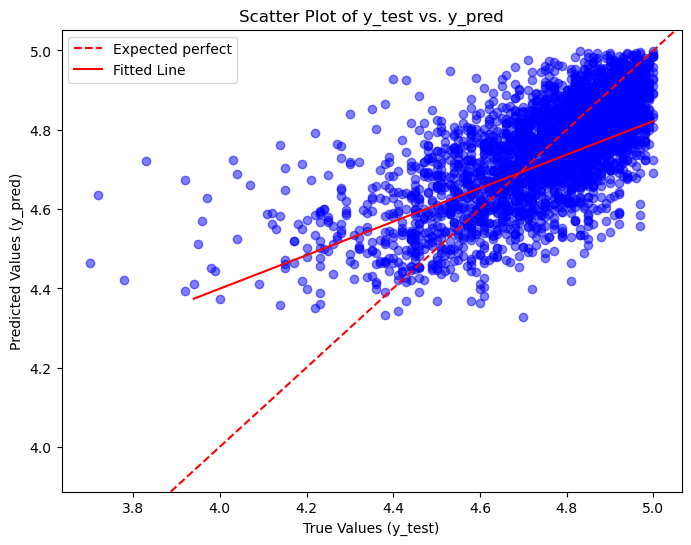

--------------------------------------- review_scores_accuracy (1) ---------------------------------------

Model has been fiteed, first glance error:
        - mse: 0.0169
        - r2:  0.3326

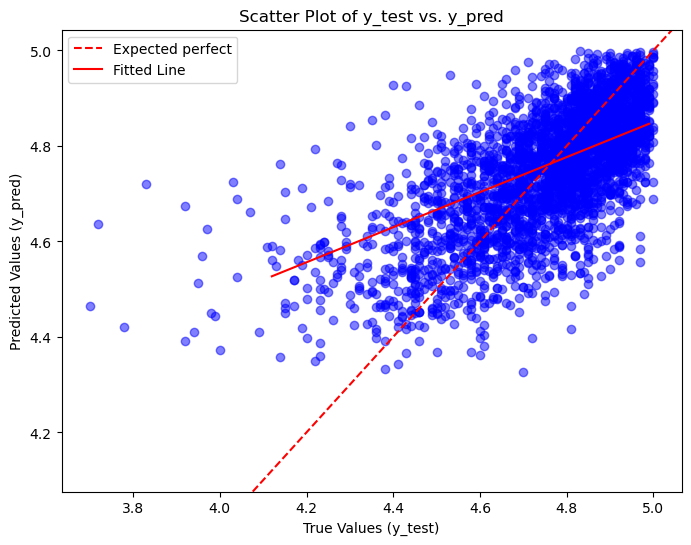

--------------------------------------- review_scores_cleanliness (2) 
---------------------------------------

Model has been fiteed, first glance error:
        - mse: 0.0287
        - r2:  0.2398

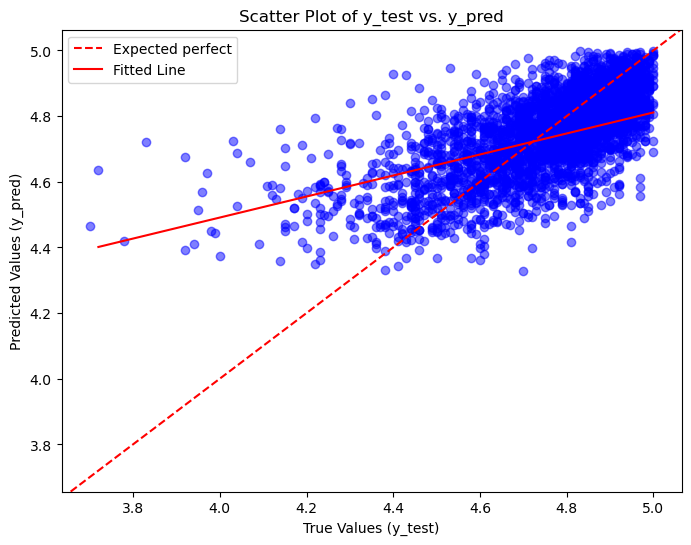

--------------------------------------- review_scores_checkin (3) ---------------------------------------

Model has been fiteed, first glance error:
        - mse: 0.0135
        - r2:  0.4178

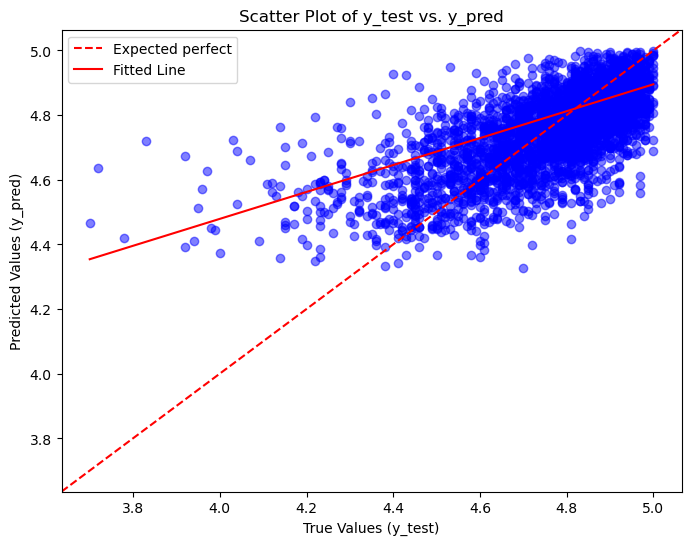

--------------------------------------- review_scores_communication (4) 
---------------------------------------

Model has been fiteed, first glance error:
        - mse: 0.0133
        - r2:  0.3751

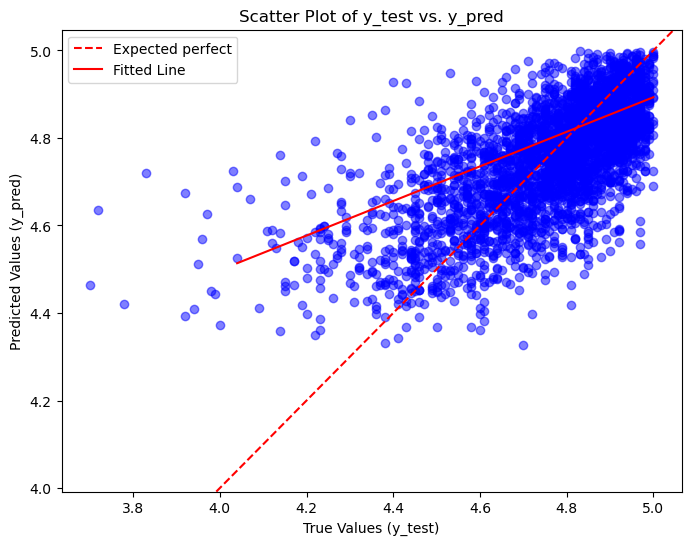

--------------------------------------- review_scores_location (5) ---------------------------------------

Model has been fiteed, first glance error:
        - mse: 0.0123
        - r2:  0.2136

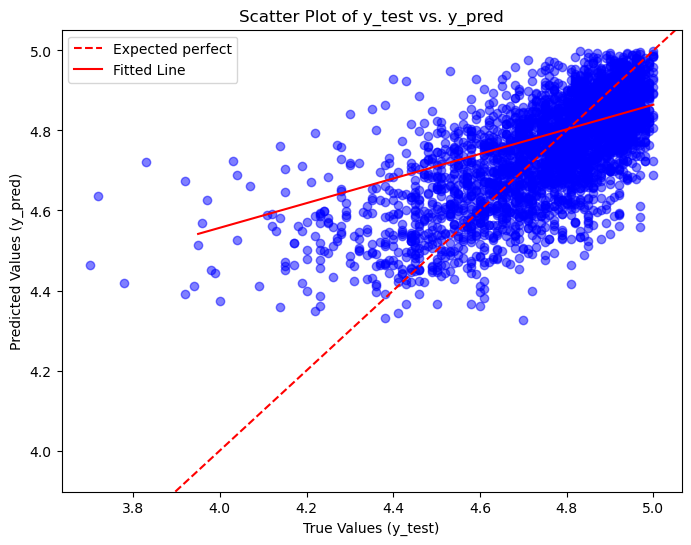

--------------------------------------- review_scores_value (6) ---------------------------------------

Model has been fiteed, first glance error:
        - mse: 0.0194
        - r2:  0.3754

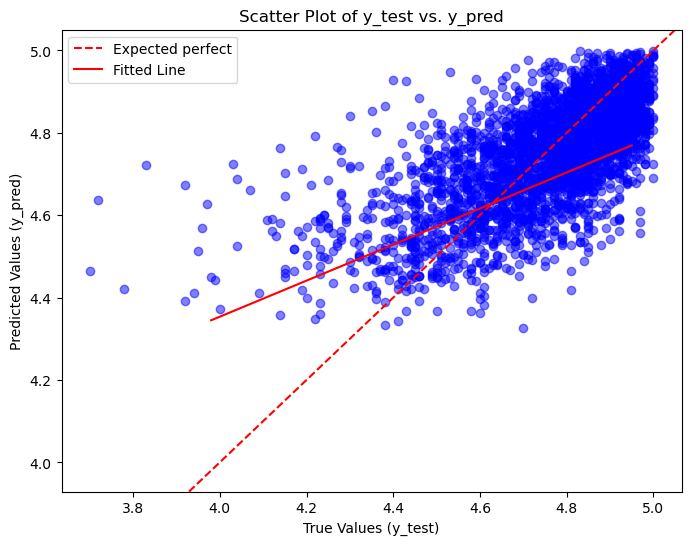

In [19]:
for i in range(7):
    print(f"        --------------------------------------- {y_train.columns[i]} ({i}) ---------------------------------------")
    true_vs_predicted(y_test,y_pred,i)

### Random forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100,random_state=0)
 
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

------------------------------------ review_scores_rating (0) ------------------------------------

Model has been fiteed, first glance error:
        - mse: 0.0202
        - r2:  0.4442

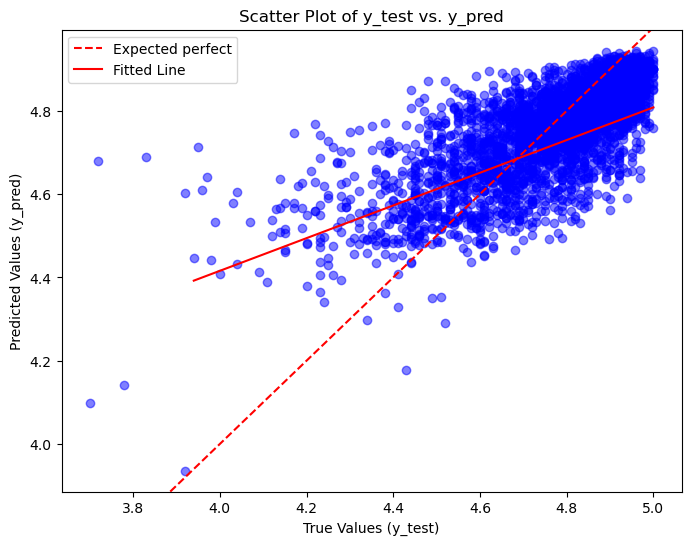

------------------------------------ review_scores_accuracy (1) ------------------------------------

Model has been fiteed, first glance error:
        - mse: 0.0148
        - r2:  0.4163

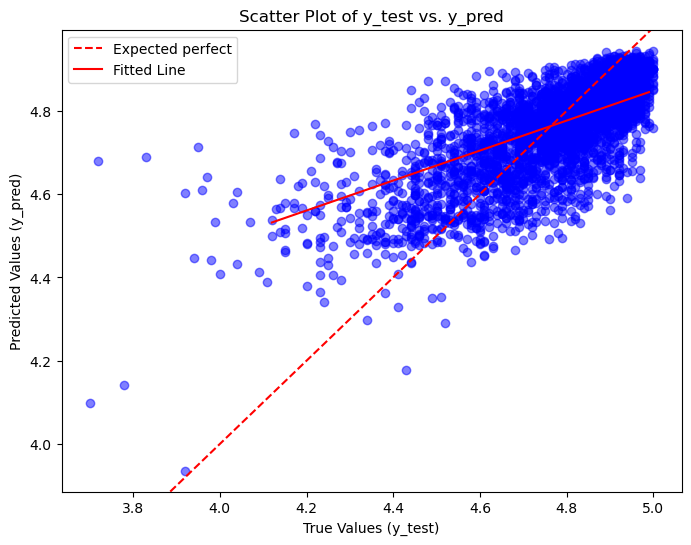

------------------------------------ review_scores_cleanliness (2) ------------------------------------

Model has been fiteed, first glance error:
        - mse: 0.0262
        - r2:  0.3073

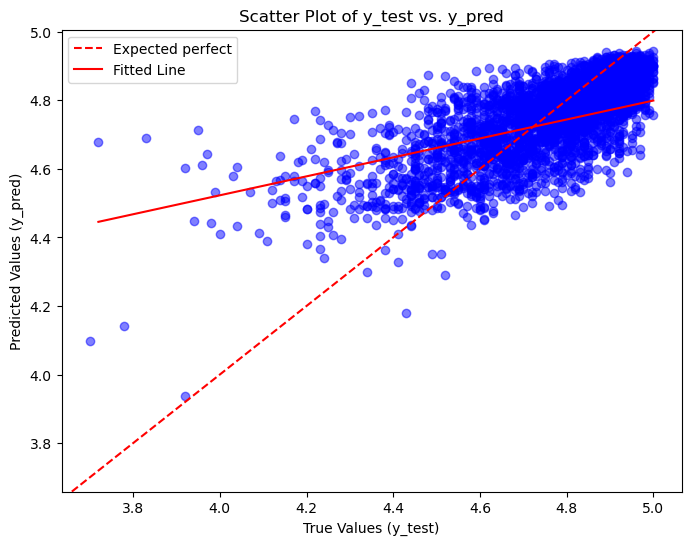

------------------------------------ review_scores_checkin (3) ------------------------------------

Model has been fiteed, first glance error:
        - mse: 0.0099
        - r2:  0.5706

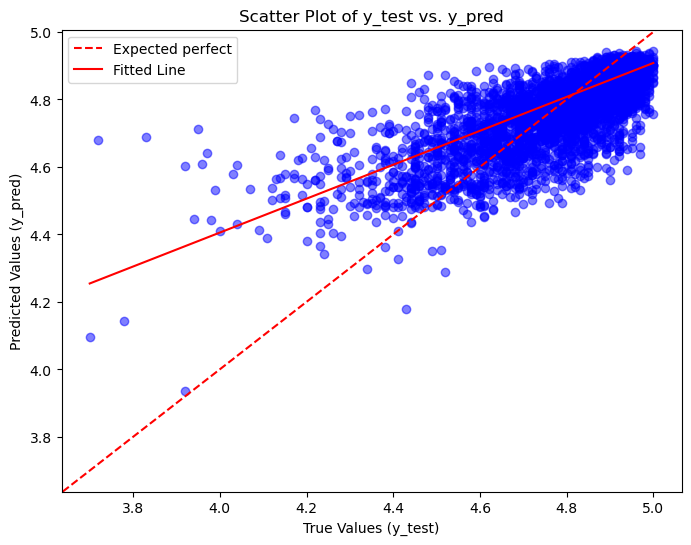

------------------------------------ review_scores_communication (4) ------------------------------------

Model has been fiteed, first glance error:
        - mse: 0.0118
        - r2:  0.4446

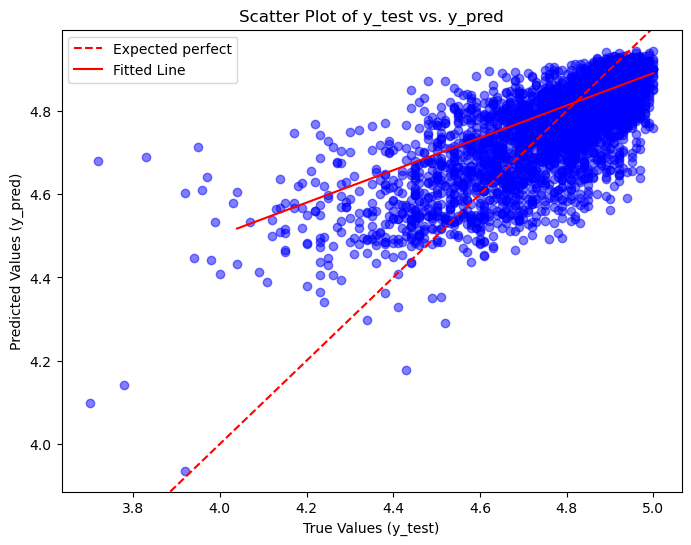

------------------------------------ review_scores_location (5) ------------------------------------

Model has been fiteed, first glance error:
        - mse: 0.0117
        - r2:  0.2513

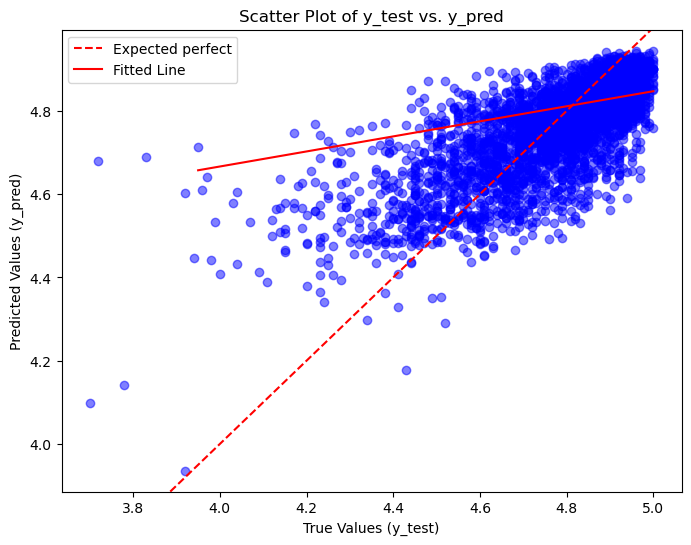

------------------------------------ review_scores_value (6) ------------------------------------

Model has been fiteed, first glance error:
        - mse: 0.0179
        - r2:  0.4264

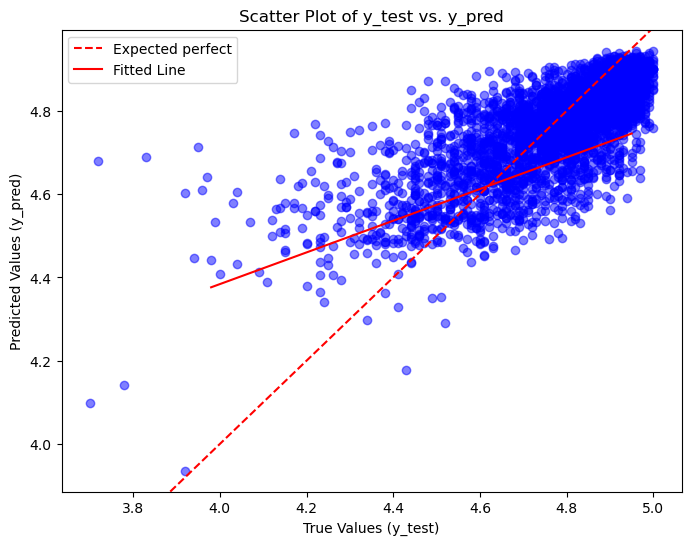

In [21]:
y_pred_rf = regressor.predict(X_test)
for i in range(7):
    print(f"        ------------------------------------ {y_train.columns[i]} ({i}) ------------------------------------")
    true_vs_predicted(y_test,y_pred_rf,i)

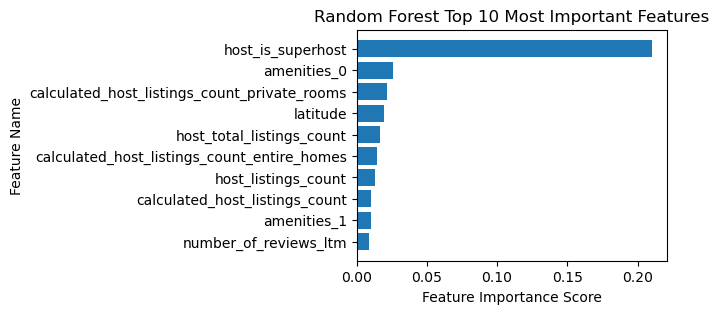

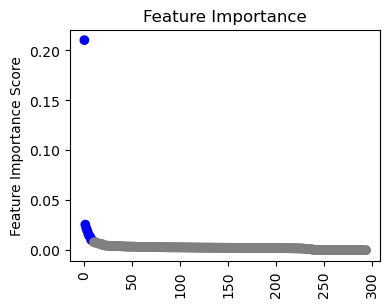

In [27]:
data = {'Name': X_train.columns, 'Score': regressor.feature_importances_}
df = pd.DataFrame(data)
df = df.sort_values(by='Score', ascending=False)
top_10 = df.head(10)

# Plot a bar chart for the top 10 features
plt.figure(figsize=(4, 3))
plt.barh(top_10['Name'], top_10['Score'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.title('Random Forest Top 10 Most Important Features')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

x = [i for i in range(len(df['Score']))]
colors = ['grey' if score < 0.009 else 'blue' for score in df['Score']]
plt.figure(figsize=(4, 3))
plt.scatter(x, df['Score'], c=colors, marker='o')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance')
plt.xticks( rotation=90)  # Set x-axis labels and rotate for better readability
plt.show()

In [121]:
#SHAP

import shap
x_sub = shap.sample(X_train,100)
explainer = shap.Explainer(regressor, X_train)
shap_values = explainer(X_test)

100%|===================| 3244/3248 [02:44<00:00]        

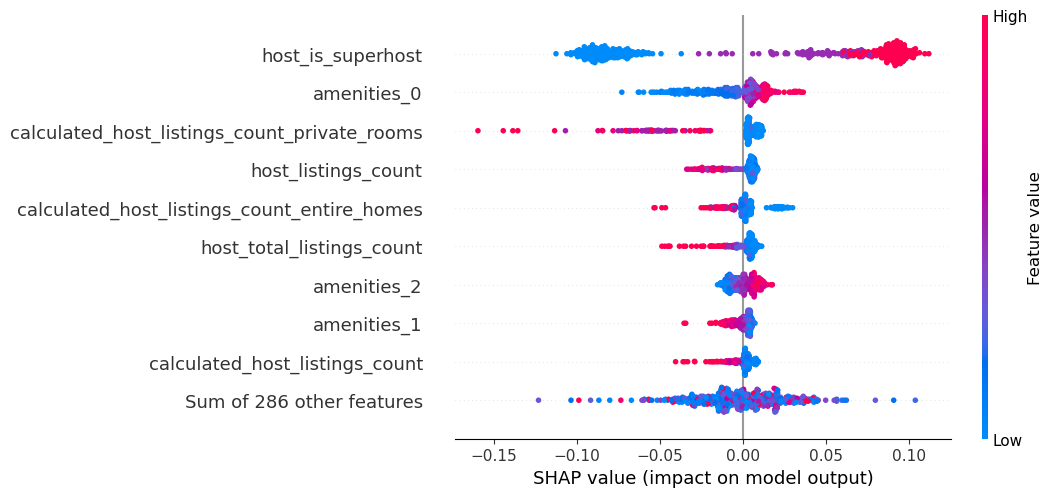

In [131]:
shap.plots.beeswarm(shap_values[:,:,0])

## 5. Model Evaluation

In [28]:
def visualise_outcom(test, pred):
    # Create a new figure with four subplots
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))
    
    # Scatter plot of y_test vs y_pred
    ax1 = axes[0]
    ax1.scatter(test, pred, marker='o', color='blue', alpha=0.5)
    ax1.set_xlabel("True Values (test)")
    ax1.set_ylabel("Predicted Values (pred)")
    ax1.set_title("Scatter Plot of True vs Predicted Values")
    ax1.set_ylim(1,5)

    # Sort the values for a smoother line plot
    sorted_indices = np.argsort(test)
    y_test_sorted = test.iloc[sorted_indices]
    y_pred_sorted = pred[sorted_indices]
    
    # Line plot of y_test vs y_pred
    ax2 = axes[1]
    ax2.plot(range(len(test)), y_test_sorted, label="True Values (test)", marker='o', linestyle='-')
    ax2.plot(range(len(pred)), y_pred_sorted, label="Predicted Values (pred)", marker='x', linestyle='--')
    ax2.set_xlabel("Data Points")
    ax2.set_ylabel("Values")
    ax2.set_title("Line Plot of True vs Predicted Values")
    #ax2.legend()


    # Adjust layout
    plt.tight_layout()

    # Show the combined figure
    plt.show()

# Example usage:
# visualise_outcom(y_test, y_pred)


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def visualise_outcom(test, pred):
   
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))

    # Scatter plot of y_test vs y_pred
    ax1 = axes[0]
    ax1.scatter(test, pred, marker='o', color='blue', alpha=0.5)
    ax1.set_xlabel("True Values (test)")
    ax1.set_ylabel("Predicted Values (pred)")
    ax1.set_title("Scatter Plot of True vs Predicted Values")
    ax1.set_ylim(1, 5)

    # Sort the values for a smoother line plot
    sorted_indices = np.argsort(test)
    y_test_sorted = test[sorted_indices]
    y_pred_sorted = pred[sorted_indices]

    # Line plot of y_test vs y_pred
    ax2 = axes[1]
    ax2.plot(range(len(test)), y_test_sorted, label="True Values (test)", marker='o', linestyle='-')
    ax2.plot(range(len(pred)), y_pred_sorted, label="Predicted Values (pred)", marker='x', linestyle='--')
    ax2.set_xlabel("Data Points")
    ax2.set_ylabel("Values")
    ax2.set_title("Line Plot of True vs Predicted Values")
    #ax2.legend(loc='upper left')

    # Adjust layout
    plt.tight_layout()

    # Show the combined figure
    plt.show()

# Example usage:
# visualise_outcom(y_test, y_pred)



In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def reslduals(y_test,y_pred,index):
    # Calculate the residuals
    residuals = y_test - y_pred

    # Create a figure with two subplots: residual error plot and distribution plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Residual Error Plot
    ax1.scatter(x=y_pred, y=residuals, color='b', marker='o', alpha=0.4, label="y_pred")
    ax1.scatter(x=y_test, y=residuals, color='g', marker='o', alpha=0.4, label = "y_test")
    ax1.set_title("Residual Error Plot")
    ax1.set_xlabel("y Values")
    ax1.set_ylabel("Residuals")
    ax1.axhline(y=0, color='r', linestyle='-')
    ax1.legend()

    # Distribution Plot
    sns.histplot(y_pred.T[index], kde=False, ax=ax2,alpha=0.5, color='g',label='y_pred')
    sns.histplot(y_test.T[index], kde=False, ax=ax2,alpha=0.5, color='b', label='y_test')
    ax2.set_title("Residuals Distribution")
    ax2.set_xlabel("Residuals")
    ax2.legend()

    plt.tight_layout()
    plt.show()



review_scores_checkin: Residual plots for Lineal Model

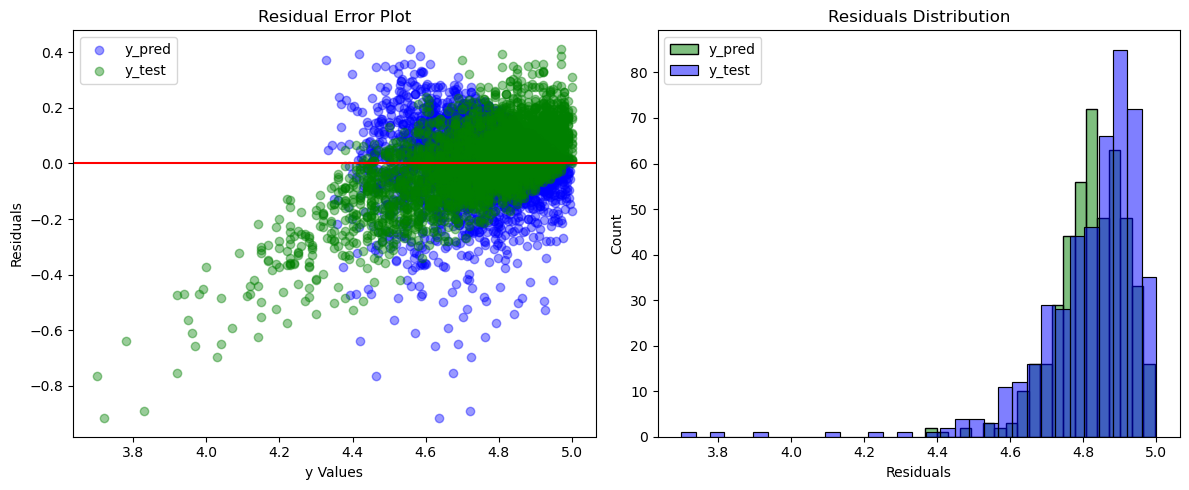

review_scores_checkin:Residual plots for Randm Forest

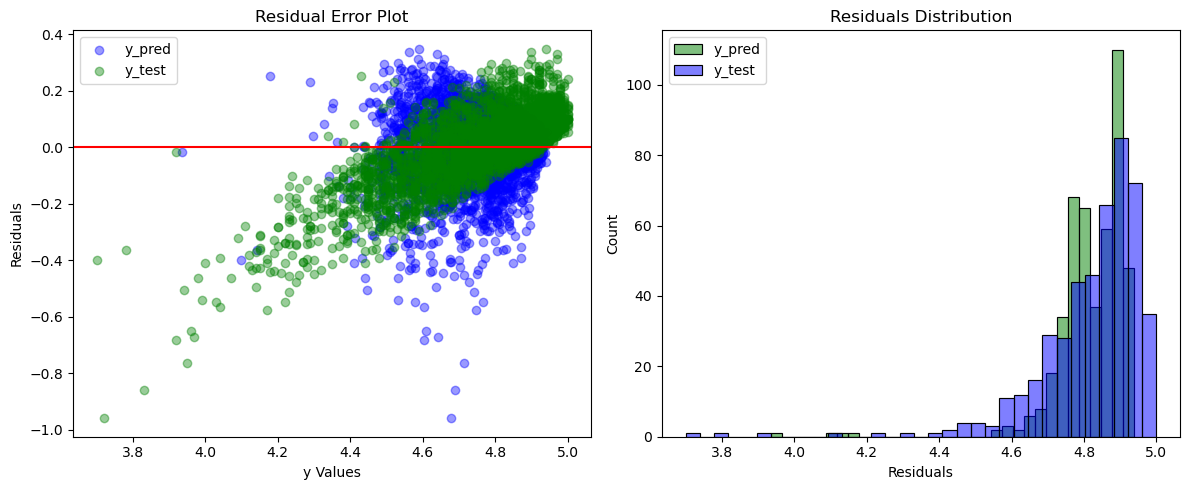

In [31]:
i = 3
y_test_lin = y_test
y_pred_lin = y_pred
print(f"{y_train.columns[i]}: Residual plots for Lineal Model")
reslduals(y_test_lin,y_pred_lin,i)
print(f"{y_train.columns[i]}:Residual plots for Randm Forest")
reslduals(y_test,y_pred_rf,i)

review_scores_rating

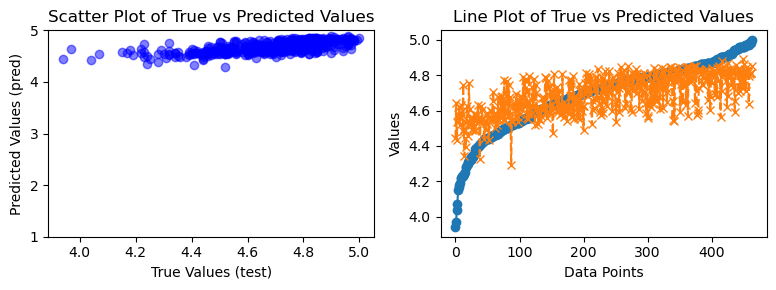

review_scores_accuracy

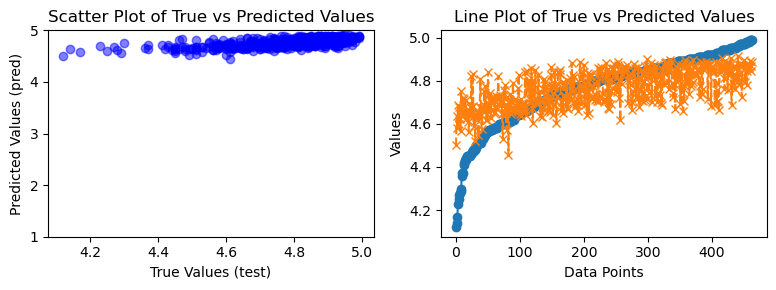

review_scores_cleanliness

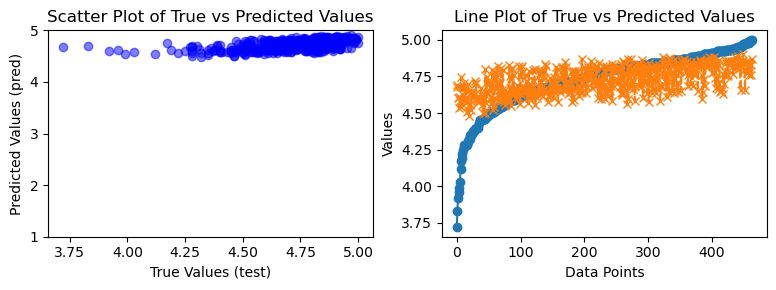

review_scores_checkin

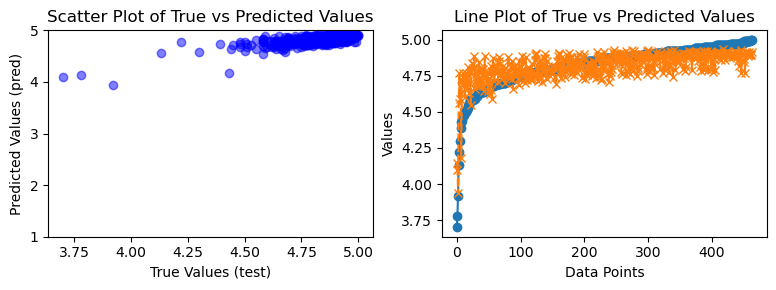

review_scores_communication

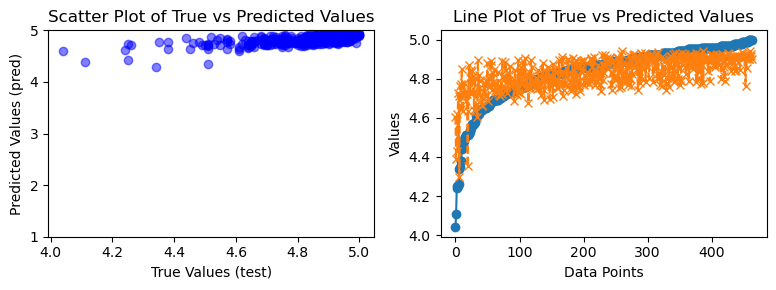

review_scores_location

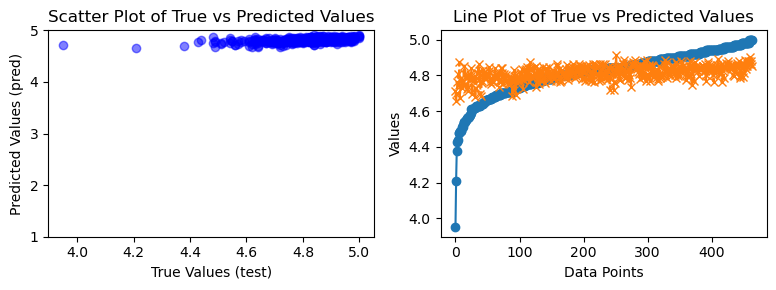

review_scores_value

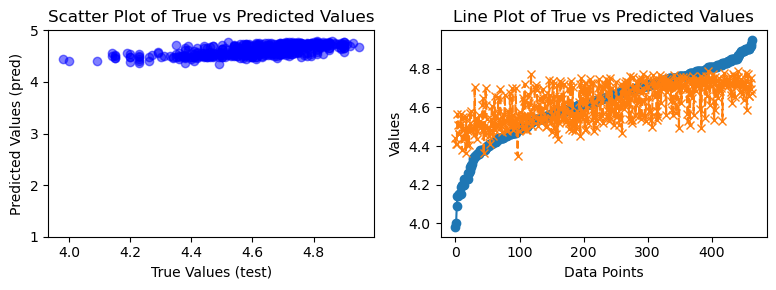

In [33]:
# Print the model's performance metrics

for i in range(7):
    print(f"{y_train.columns[i]}")
    visualise_outcom(y_test.T[i], y_pred_rf.T[i])

**-------------------------------------------------------------------------------------------------------------------------------------------**

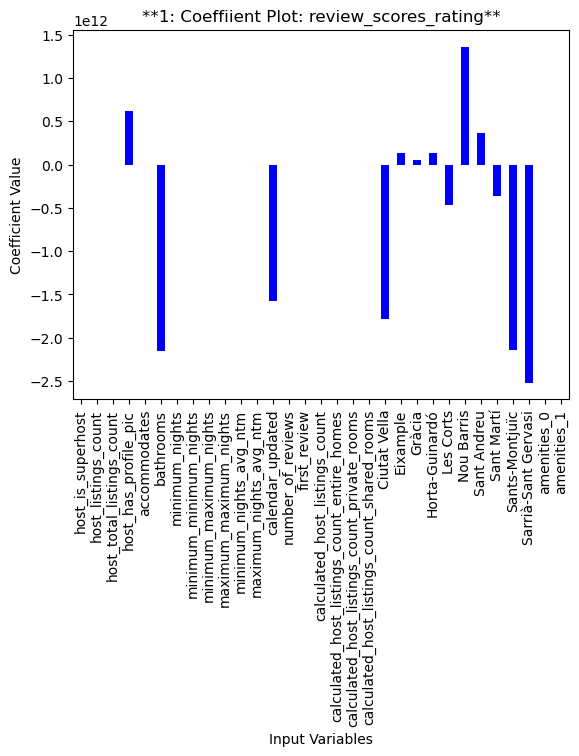

**-------------------------------------------------------------------------------------------------------------------------------------------**

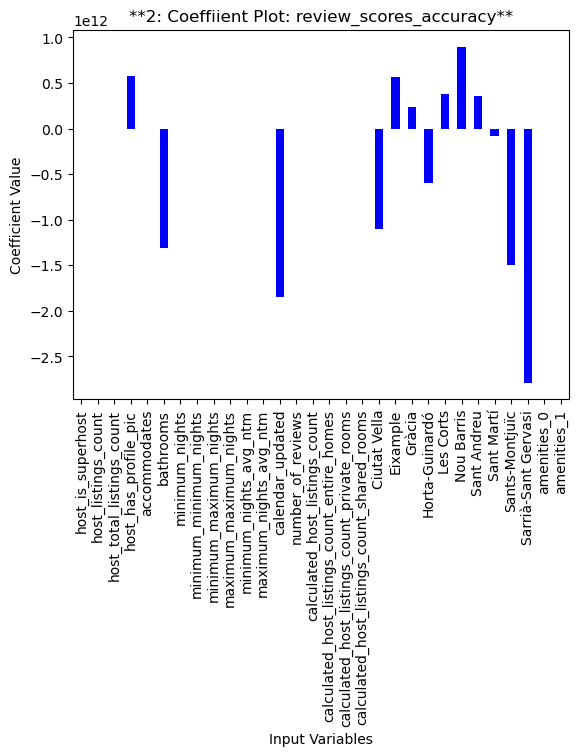

**-------------------------------------------------------------------------------------------------------------------------------------------**

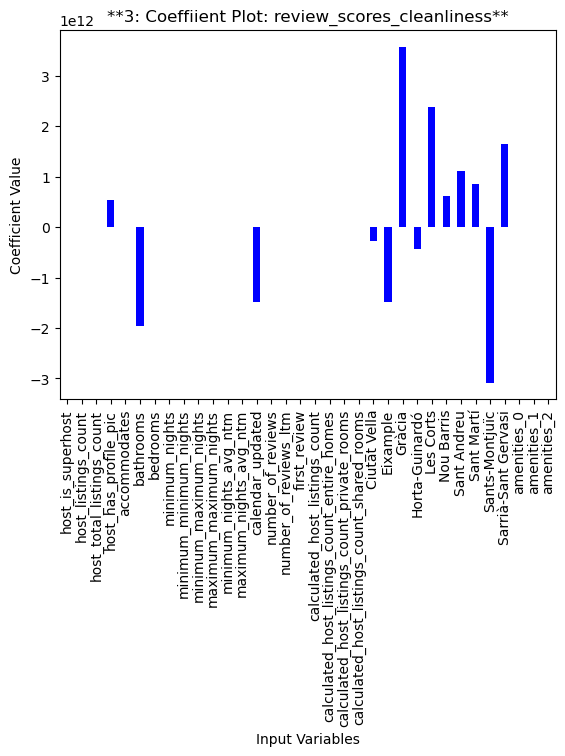

**-------------------------------------------------------------------------------------------------------------------------------------------**

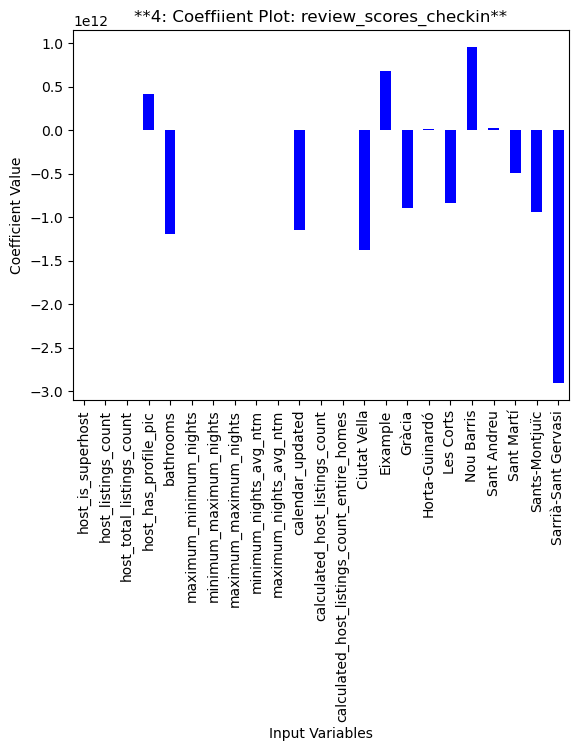

**-------------------------------------------------------------------------------------------------------------------------------------------**

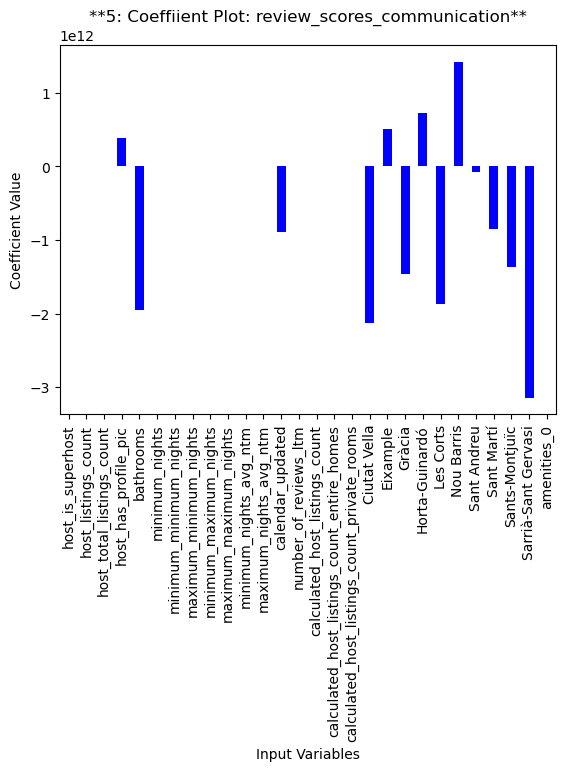

**-------------------------------------------------------------------------------------------------------------------------------------------**

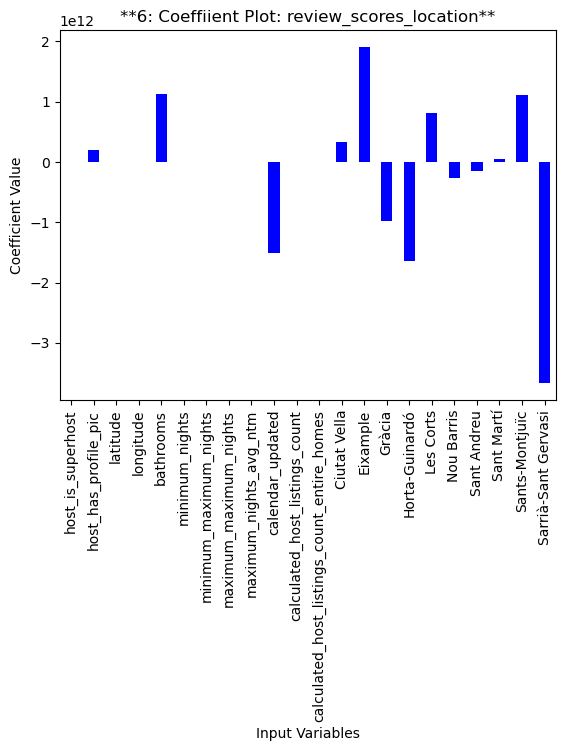

**-------------------------------------------------------------------------------------------------------------------------------------------**

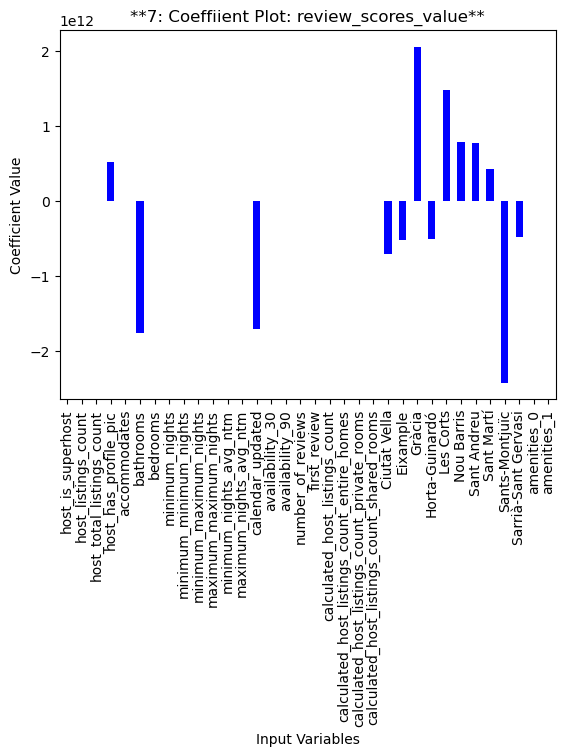

In [22]:
def coeff_plot(coefs,col_names, title):
    coef = pd.Series(coefs, index=col_names)

    coef = coef[(coef > 0.02) | (coef < -0.02)]
    coef.plot(kind='bar', color='blue')
    plt.title(title)
    plt.xlabel('Input Variables')
    plt.ylabel('Coefficient Value')
    plt.show()
    
for i in range(7):
    display(Markdown(f"**-------------------------------------------------------------------------------------------------------------------------------------------**"))
    coeff_plot(model.coef_[i],A.columns,f"**{i+1}: Coeffiient Plot: {outpus_types[i]}**")

## 6. Model Tuning

## 7. Cross-Validation

## 8. Predictions

#
<table style="width: 100%;">
  <tr>
      <td style="text-align: left;"><td>
    <td style="text-align: right;"><img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Logo_Universitat_de_Barcelona.png" alt="University of Barcelona Logo" width="200" /></td>
  </tr>
</table>